<a href="https://colab.research.google.com/github/Amarjeet-1998/Python_Practice2022/blob/main/collaborative%20filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

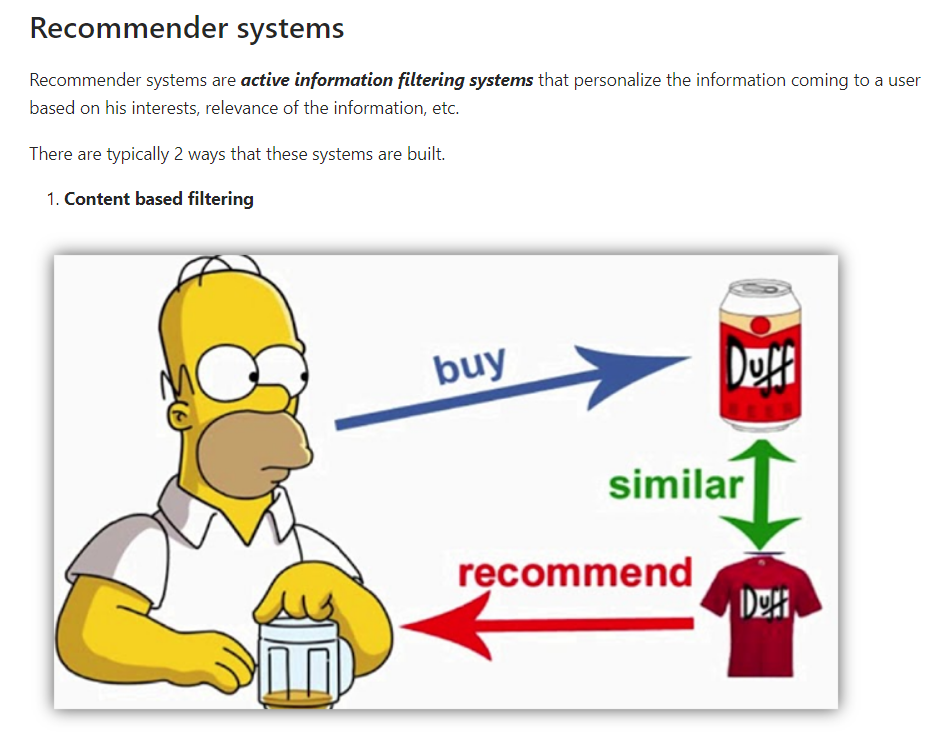

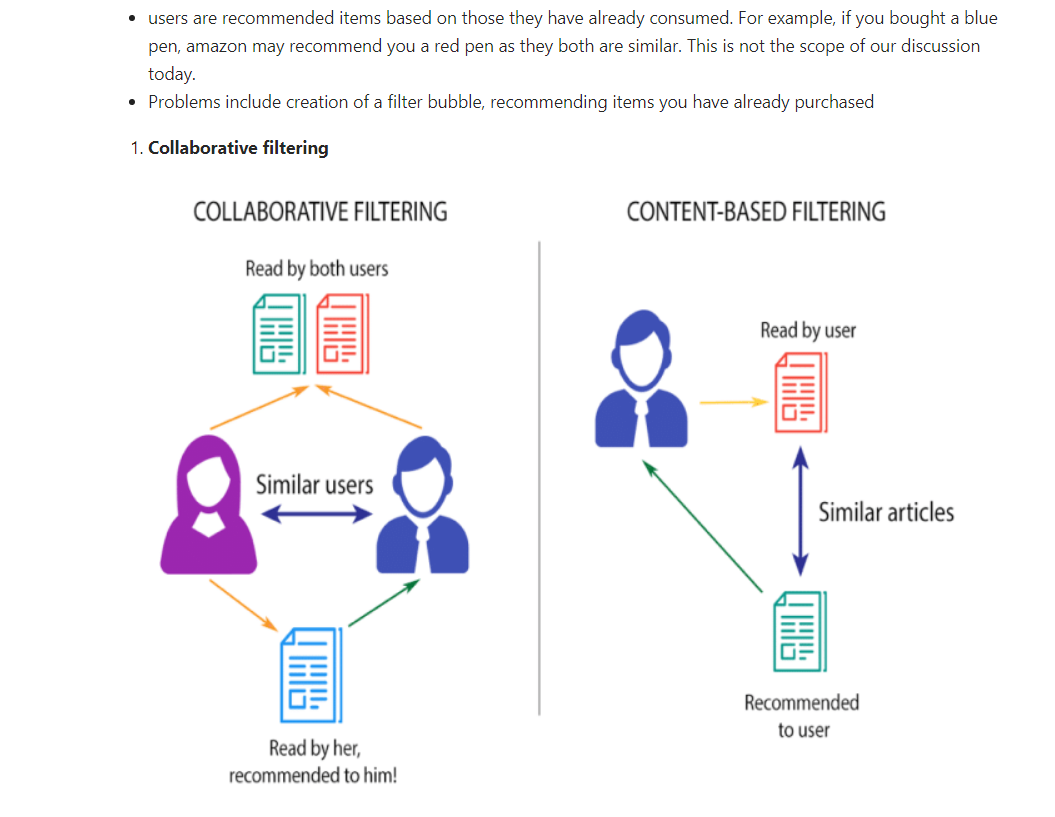

CF accumulates customer product ratings, identifies customers with common ratings, and offers recommendations based on inter-customer comparisons. It’s based on the idea that people who agree in their evaluations of certain items in the past are likely to agree again in the future.


# Collaborative Filtering
There are 2 ways to build collaborative filtering systems.

Memory based CF

User based:

User 1 rated movie A highly

User 2 rated movie A highly -> User 1 and User 2 are similar.

Hence, if User 1 rates movie B low, user 2 will also rate movie B low
Item-based:

Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated

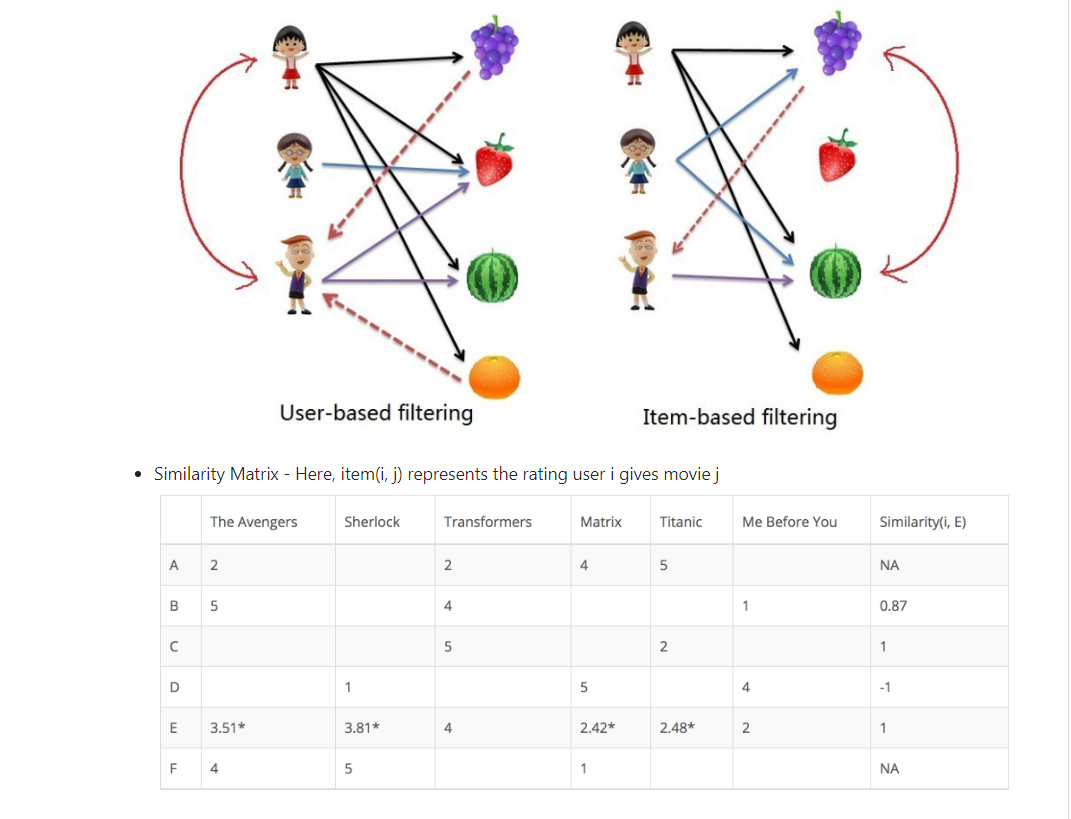

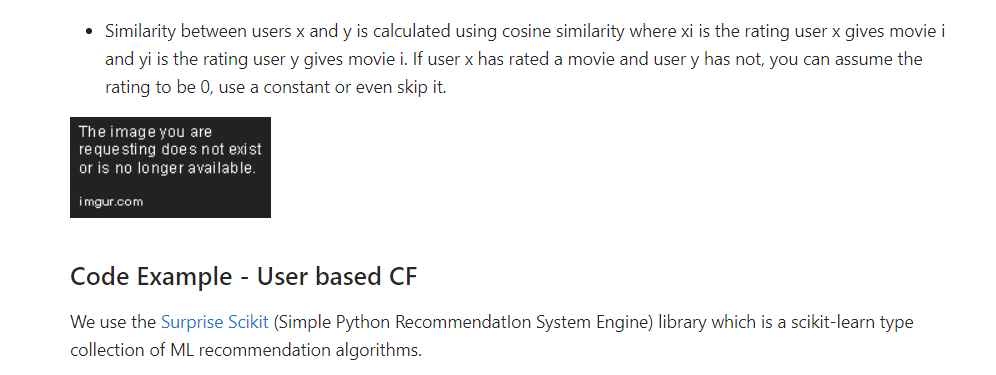

In [1]:
%pip install scikit-surprise
from surprise import Dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 2.1 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633977 sha256=04abdd59c9adc3fdc89d14f779d677c61f030b2cf2f6e820e0fb3160f24574a7
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [2]:

#loads the builtin Movielens-100k data
movielens = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [3]:
import pandas as pd
from surprise import Reader
from surprise import KNNWithMeans

# This is the same data that was plotted for similarity earlier
# with one new user "E" who has rated only movie 1

ratings_dict = {
    "items":[1,1,1,2,2,3,3,3,3,4,4,4,5,5,6,6,6],
    "user": ['A', 'B', 'F', 'D', 'F', 'A', 'B', 'C', 'F', 'A', 'D', 'F', 'A', 'C', 'B', 'D', 'E'],
    "rating": [2, 5, 4, 1, 5, 2, 4, 5, 4, 4, 5, 1, 5, 2, 1, 4, 2],
}

df = pd.DataFrame(ratings_dict)
reader = Reader(rating_scale=(1,5))

# Loads Pandas dataframe
data = Dataset.load_from_df(df[["user","items","rating"]], reader)

# To use user-based cosine similarity

sim_options = {
    "name": "cosine",
    "user_based": True,
}
algo = KNNWithMeans(sim_options=sim_options)


In [4]:
# Train
trainingSet = data.build_full_trainset()
algo.fit(trainingSet)

#Predict
prediction = algo.predict('E',1)
print(prediction.est)

Computing the cosine similarity matrix...
Done computing similarity matrix.
3.6666666666666665


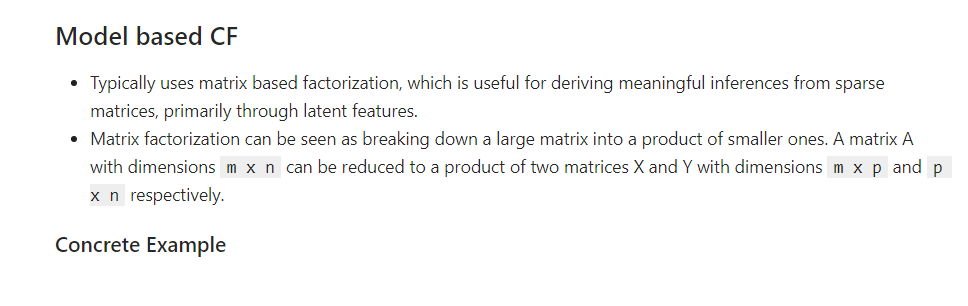

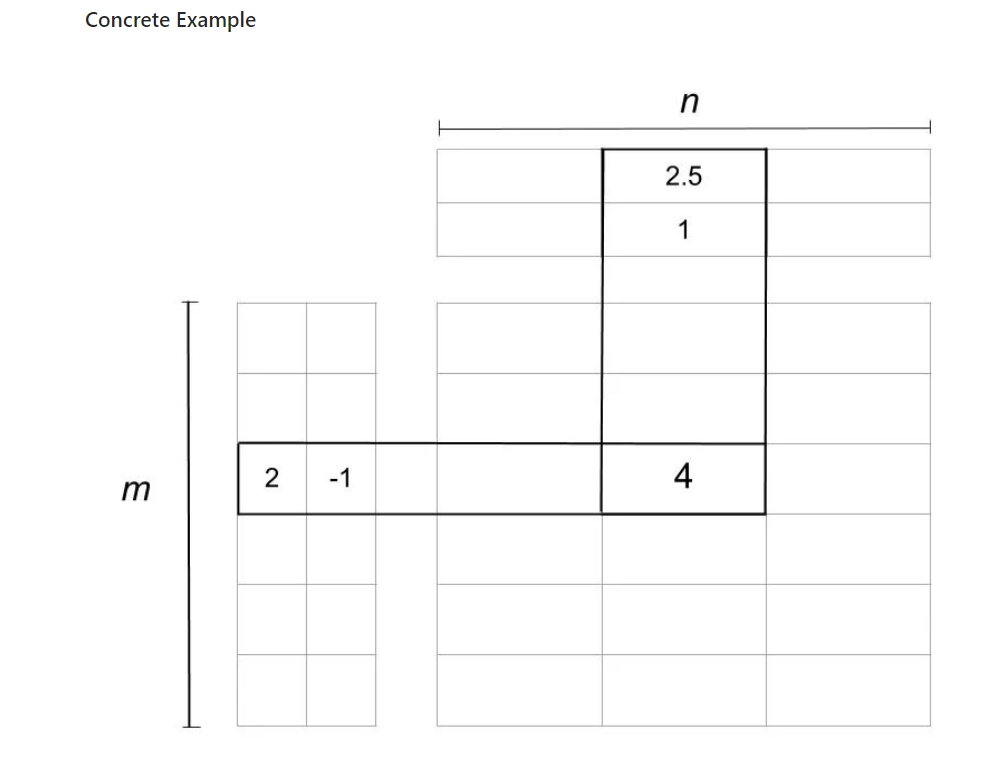

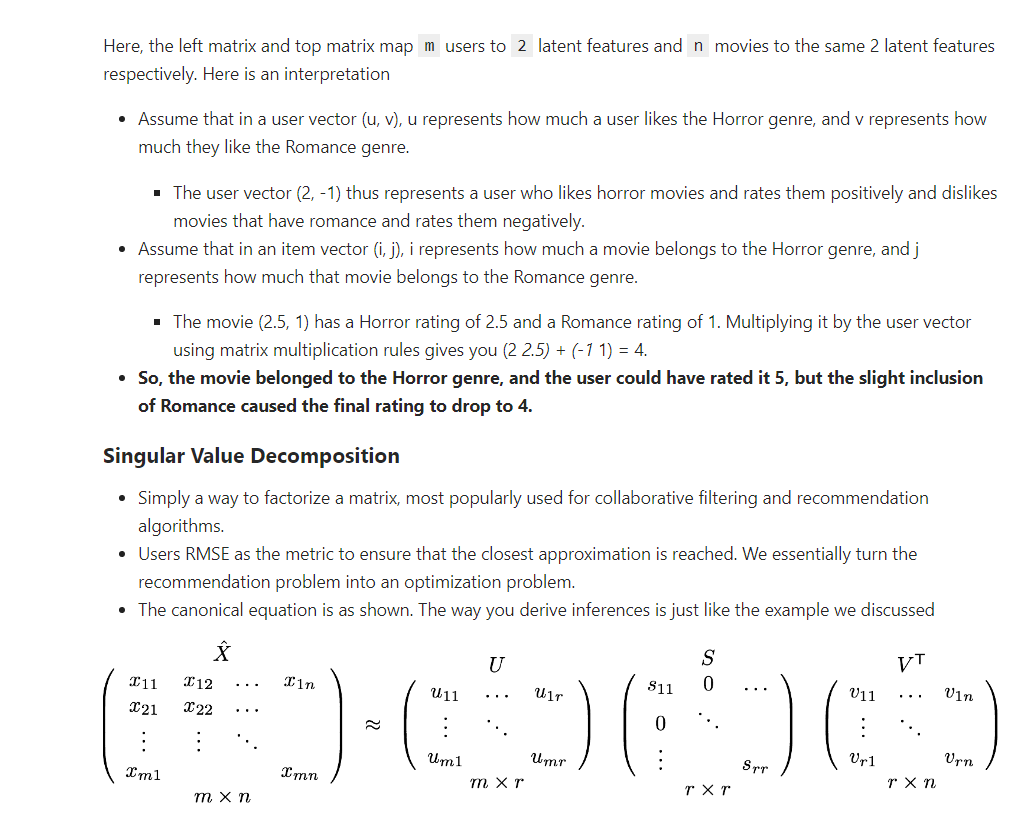

# Code Example - SVD based CF

We use GridSearchCV in conjucntion with the SVD algorithm, to give us the most optimal results by minimizing RMSE.

In [5]:
from surprise import SVD
from surprise.model_selection import GridSearchCV

"""
lr_all is the learning rate for all parameters (how much the parameters are adjusted in each iteration)
reg_all is the regularization term for all parameters, which is a penalty term added to prevent overfitting.
"""
param_grid = {
    "n_epochs": [5, 10],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}

# Get the best params using GridSearchCV
gs = GridSearchCV(SVD, param_grid, measures=["rmse"], cv=3)
gs.fit(data)
best_params = gs.best_params["rmse"]

# Extract and train model with best params
svd_algo = SVD(n_epochs=best_params['n_epochs'],
               lr_all=best_params['lr_all'],
               reg_all=best_params['reg_all'])
svd_algo.fit(trainingSet)

# Predict
prediction = svd_algo.predict('E', 1)
print (prediction.est)

3.3417625885853215


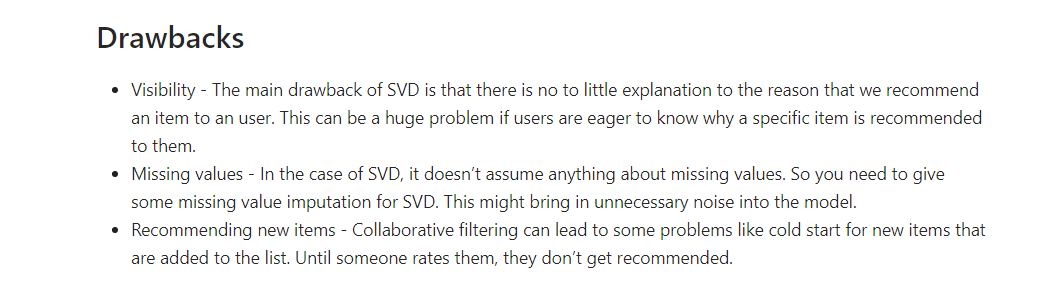

# References
Building collaborative filtering systems
Collaborative filtering using KNN
Collaborative filtering using SVD
Beginner's guide to creating an SVD Recommender System

In [6]:
pip install reco

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 2.1 MB/s 
     |████████████████████████████████| 668 kB 41.9 MB/s 
  Created wheel for reco: filename=reco-0.1.16-py3-none-any.whl size=673874 sha256=3a8de79338f219b825d814fe95b3bf99fde69279775750c59ebfbd5efcb2074f
  Stored in directory: /root/.cache/pip/wheels/a5/14/37/4ee76e4747856254b568f3a015beaa3bb011bef7d06c1387d1
Successfully built reco
